<a id='external'></a>  
## 3. Import external data: Holidays,  Date features, Weather

###  3.1 Import holidays

In [80]:
# load the univariate data and make a copy 
tal_hol = tal_uni.copy()
# Import US holiday data
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
dates_range = pd.date_range(start=tal_hol.index.min(), end=tal_hol.index.max())
us_holidays = calendar().holidays(start=dates_range.min(), end=dates_range.max())
# create a 'holiday' nominal feature
tal_hol['holiday'] = (tal_hol.index.isin(us_holidays)).astype(np.int8)
# print the first 5 rows of the data
tal_hol.head()

,demand,holiday
2015-07-01 01:00:00,225.0,0
2015-07-01 02:00:00,222.0,0
2015-07-01 03:00:00,213.0,0
2015-07-01 04:00:00,206.0,0
2015-07-01 05:00:00,207.0,0


In [83]:
tal_hol[tal_hol['holiday']==1].index

DatetimeIndex(['2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11',
               '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18',
               '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-26',
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29',
               '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27',
               '2019-07-04', '2019-09-02', '2019-10-14'],
              dtype='datetime64[ns]', freq=None)

### 3.2 Date extraction

### For month, group into quarters or seasons, depending upon the use case. Eg: Jan-Mar, Apr-Jun, etc.
### For hour-of-day, group into time-of-day buckets: night, morning, afternoon, evening.
### For day-of-week, group into weekday, weekend.

In [84]:
# data extraction
tal_hol['quarter'] = tal_hol.index.quarter
tal_hol['weekdays'] = tal_hol.index.weekday
tal_hol['hour'] = tal_hol.index.hour

In [85]:
tal_hol.shape

(37635, 5)

In [87]:
# Use pd.cut to create bins for the hour labels.
# 0:Night, 1: Morning, 2: Afternoon, 3: Night
tal_d = tal_hol.assign(day=pd.cut(tal_hol.index.hour,[-1,6,12,18,24],labels=['0','1','2','3'])) 
#0: Weekdays, 1: Weekends
tal_hol = tal_d.assign(week=pd.cut(tal_hol.index.weekday,[-1,5,6],labels=['0','1']))

In [105]:
tal_hol.drop(columns = ['weekdays', 'hour'], inplace = True)
tal_hol.head()

,demand,holiday,quarter,day,week
2015-07-01 01:00:00,225.0,0,3,0,0
2015-07-01 02:00:00,222.0,0,3,0,0
2015-07-01 03:00:00,213.0,0,3,0,0
2015-07-01 04:00:00,206.0,0,3,0,0
2015-07-01 05:00:00,207.0,0,3,0,0


In [106]:
# Check the number of classes for nominal features
tal_hol.nunique()

demand     433
holiday      2
quarter      4
day          4
week         2
dtype: int64

### 3.3 Import Weather infomation of the city Tallahassee
#### Again we need to check the quality of weather data and deal with duplication, missing values if any.  The weather data is also a Time series data recorded hourly. 

In [90]:
# import external data 
tal_wea = pd.read_csv("Tallahassee_raw_data.csv", parse_dates=True)

In [91]:
tal_wea["timestamp"] = tal_wea["timestamp"].apply(lambda s: s[:-6])
tal_wea["timestamp"] = pd.to_datetime(tal_wea["timestamp"])

In [92]:
tal_wea = tal_wea.set_index('timestamp')

In [93]:
tal_wea.head()

,Unnamed: 0,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
timestamp,,,,,,,,,,,,,,,,,,,,
2015-06-30 00:00:00,0,78.29,0.0,72.83,0.88,clear-night,NaN,NaN,0.0,0.0,NaN,1017.10,Humid,76.79,1435636800,0.0,9.997,226.0,1.04,0.77
2015-06-30 01:00:00,1,76.91,0.0,72.64,0.91,clear-night,NaN,NaN,0.0,0.0,NaN,1017.31,Humid,75.38,1435640400,0.0,9.997,227.0,1.70,1.70
2015-06-30 02:00:00,2,76.30,0.0,72.14,0.91,clear-night,NaN,NaN,0.0,0.0,NaN,1017.20,Humid,74.82,1435644000,0.0,9.425,214.0,2.53,2.05
2015-06-30 03:00:00,3,76.12,0.0,72.42,0.93,clear-night,NaN,NaN,0.0,0.0,NaN,1017.31,Humid,74.59,1435647600,0.0,9.141,233.0,1.82,0.76
2015-06-30 04:00:00,4,75.70,0.0,72.29,0.94,clear-night,NaN,NaN,0.0,0.0,NaN,1017.20,Humid,74.17,1435651200,0.0,8.855,239.0,2.23,1.16


In [94]:
col_wea = ['temperature', 'cloudCover','humidity', 'pressure', 'windBearing', 'windGust', 'windSpeed']

In [95]:
# keep only two features
tal_wea = tal_wea[col_wea]
tal_wea.head()

,temperature,cloudCover,humidity,pressure,windBearing,windGust,windSpeed
timestamp,,,,,,,
2015-06-30 00:00:00,76.79,0.0,0.88,1017.10,226.0,1.04,0.77
2015-06-30 01:00:00,75.38,0.0,0.91,1017.31,227.0,1.70,1.70
2015-06-30 02:00:00,74.82,0.0,0.91,1017.20,214.0,2.53,2.05
2015-06-30 03:00:00,74.59,0.0,0.93,1017.31,233.0,1.82,0.76
2015-06-30 04:00:00,74.17,0.0,0.94,1017.20,239.0,2.23,1.16


In [96]:
# convert temperature fahrenheit to Celsius
tal_wea['temperature']= round((tal_wea['temperature'] - 32) / 1.8,2)
tal_wea.head()

,temperature,cloudCover,humidity,pressure,windBearing,windGust,windSpeed
timestamp,,,,,,,
2015-06-30 00:00:00,24.88,0.0,0.88,1017.10,226.0,1.04,0.77
2015-06-30 01:00:00,24.10,0.0,0.91,1017.31,227.0,1.70,1.70
2015-06-30 02:00:00,23.79,0.0,0.91,1017.20,214.0,2.53,2.05
2015-06-30 03:00:00,23.66,0.0,0.93,1017.31,233.0,1.82,0.76
2015-06-30 04:00:00,23.43,0.0,0.94,1017.20,239.0,2.23,1.16


In [97]:
tal_hol.shape

(37635, 7)

In [98]:
tal_wea.shape

(37765, 7)

In [99]:
# check the duplication. Duplication only allowed on the DST. 
tal_wea[tal_wea.index.duplicated()]

,temperature,cloudCover,humidity,pressure,windBearing,windGust,windSpeed
timestamp,,,,,,,
2015-11-01 01:00:00,23.29,1.00,0.85,1014.39,135.0,6.26,4.12
2016-11-06 01:00:00,12.81,0.00,0.64,1022.70,52.0,1.16,1.07
2017-11-05 01:00:00,17.02,0.13,0.91,1017.78,348.0,0.42,0.35
2018-03-17 00:00:00,15.48,0.00,0.88,1018.19,242.0,3.52,1.35
2018-03-17 01:00:00,14.78,0.00,0.91,1017.89,239.0,1.29,0.41
2018-03-17 02:00:00,13.80,0.05,0.93,1017.78,105.0,0.93,0.93
2018-03-17 03:00:00,13.31,0.00,0.93,1017.71,NaN,0.21,0.05
2018-03-17 04:00:00,12.59,0.19,0.93,1017.10,87.0,0.28,0.28
2018-03-17 05:00:00,12.19,0.35,0.94,1016.71,90.0,0.29,0.29


### As I expected the duplications are on the DST except the date 2018-03-17. So I will check the records on that day to see. If they are just duplicated and have the same numbers and will be deleted with the rest of duplications. 

In [100]:
# Delete the duplications
tal_wea = tal_wea[~tal_wea.index.duplicated()]

### We first merge the two files using left join so that the dimension of the dataframe after merging should be the same as the electricity demand file.  Then we will deal with the missing values. Because after merging there are more missing values due to missing records in the certain days which occur in the original demand file. 

In [107]:
# Merge the files
tal_both = pd.merge(left = tal_hol, right = tal_wea, left_index = True, right_index = True, how="left")

In [108]:
# It is the same dimension as tal_hol.
tal_both.shape

(37635, 12)

In [109]:
# check the last 5 records of the datafile with weather information and holiday info. 
tal_both.tail()

,demand,holiday,quarter,day,week,temperature,cloudCover,humidity,pressure,windBearing,windGust,windSpeed
2019-10-15 23:00:00,337.0,0,4,3,0,22.72,1.00,0.97,1012.60,149.0,3.68,2.63
2019-10-16 00:00:00,314.0,0,4,0,0,23.24,1.00,0.96,1013.21,180.0,4.75,2.82
2019-10-16 01:00:00,288.0,0,4,0,0,23.31,0.75,0.96,1012.20,174.0,2.73,2.11
2019-10-16 02:00:00,269.0,0,4,0,0,23.27,1.00,0.97,1012.01,175.0,1.67,1.38
2019-10-16 03:00:00,257.0,0,4,0,0,23.16,0.82,0.96,1011.60,177.0,1.62,1.62


In [110]:
tal_both.isnull().sum()

demand           0
holiday          0
quarter          0
day              0
week             0
temperature     20
cloudCover     127
humidity        30
pressure       107
windBearing    106
windGust        76
windSpeed       32
dtype: int64

###  For time series data each record is dependent with the previous records.  The weather data is hourly recorded. One method we can suggest is LOCF (Last observation carried forward) algorithm. Because we assume the weather will not dramatically change within one hour. 

In [111]:
# impute the missing values using LOCF
tal_imp = impy.imputation.ts.locf(tal_both[col_wea], axis=1)

In [112]:
tal_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37635 entries, 0 to 37634
Data columns (total 7 columns):
0    37635 non-null float64
1    37635 non-null float64
2    37635 non-null float64
3    37635 non-null float64
4    37635 non-null float64
5    37635 non-null float64
6    37635 non-null float64
dtypes: float64(7)
memory usage: 2.0 MB


In [113]:
tal_final = pd.DataFrame(tal_imp.values, index = tal_both.index, columns = col_wea)

In [114]:
#now replace columns in original dataframe
tal_both.loc[:,col_wea] = tal_final

In [115]:
tal_both.isnull().sum()

demand         0
holiday        0
quarter        0
day            0
week           0
temperature    0
cloudCover     0
humidity       0
pressure       0
windBearing    0
windGust       0
windSpeed      0
dtype: int64

In [117]:
tal_both.shape

(37635, 12)

#### Visualization

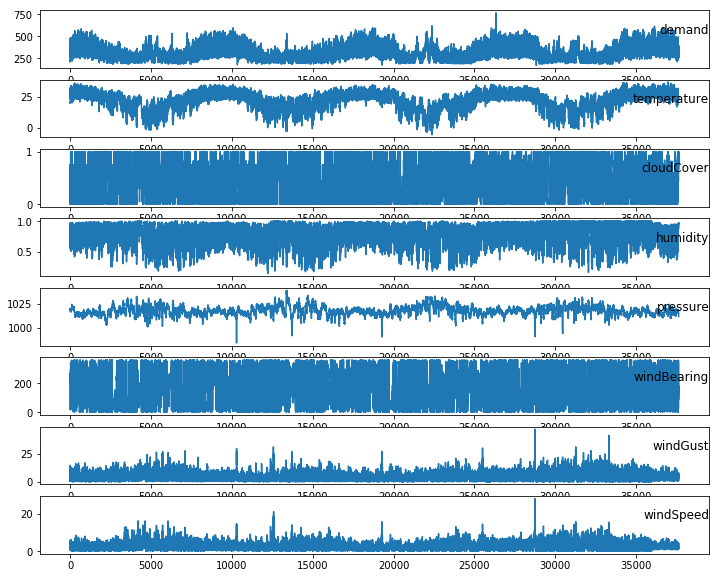

In [116]:
# specify columns to plot
groups = [0,5, 6, 7, 8, 9, 10, 11]
i = 1

# plot each column
plt.figure(figsize=(12,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(tal_both.values[:, group])
    plt.title(tal_both.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

<a id='correlation'></a>  
### 3.4. Correlation analysis between metrical variables to the demand

### Descriptive statistics

In [118]:
tal_both.describe()

,demand,holiday,quarter,temperature,cloudCover,humidity,pressure,windBearing,windGust,windSpeed
count,37635.000000,37635.000000,37635.00000,37635.000000,37635.000000,37635.000000,37635.000000,37635.000000,37635.000000,37635.000000
mean,323.745397,0.001143,2.55180,20.917752,0.463484,0.781308,1017.419881,171.448200,4.844033,2.917711
std,84.876731,0.033783,1.09383,7.512166,0.362791,0.185085,4.798093,107.923303,4.030277,2.247006
min,167.000000,0.000000,1.00000,-5.930000,0.000000,0.150000,984.180000,0.000000,0.000000,0.000000
25%,264.000000,0.000000,2.00000,16.380000,0.130000,0.660000,1014.390000,76.000000,1.510000,1.050000
50%,305.000000,0.000000,3.00000,22.420000,0.440000,0.840000,1017.220000,168.000000,4.000000,2.610000
75%,376.000000,0.000000,3.00000,25.965000,0.750000,0.940000,1020.250000,268.000000,7.260000,4.210000
max,769.000000,1.000000,4.00000,37.040000,1.000000,1.000000,1038.680000,359.000000,46.970000,27.990000


### We apply Pearson correlation to the metrical variables: 'demand','temperature', 'cloudCover','humidity', 'pressure', 'windBearing', 'windGust', 'windSpeed'. While we leave the nominal variables first aside. 

In [119]:
num_features = ['demand','temperature', 'cloudCover','humidity', 'pressure', 'windBearing', 'windGust', 'windSpeed']

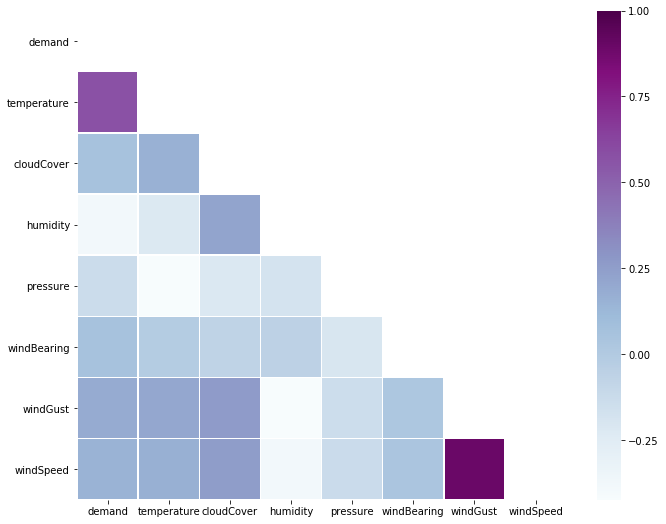

,demand,temperature,cloudCover,humidity,pressure,windBearing,windGust,windSpeed
demand,1.000000,0.577302,0.065585,-0.379278,-0.129922,0.062391,0.191311,0.150580
temperature,0.577302,1.000000,0.162028,-0.219053,-0.423592,-0.008994,0.206398,0.168166
cloudCover,0.065585,0.162028,1.000000,0.221891,-0.216426,-0.063108,0.264969,0.256540
humidity,-0.379278,-0.219053,0.221891,1.000000,-0.179766,-0.056571,-0.421626,-0.384577
pressure,-0.129922,-0.423592,-0.216426,-0.179766,1.000000,-0.200350,-0.137034,-0.126443
windBearing,0.062391,-0.008994,-0.063108,-0.056571,-0.200350,1.000000,0.027473,0.039988
windGust,0.191311,0.206398,0.264969,-0.421626,-0.137034,0.027473,1.000000,0.898661
windSpeed,0.150580,0.168166,0.256540,-0.384577,-0.126443,0.039988,0.898661,1.000000


In [120]:
# Compute the correlation matrix 
corr_all = tal_both[num_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

corr_all

### Conclusion of correlation analysis:
### Temperature has strong correlation with the demand. So the demand of electricity will increase when the temperature increases. While humidity has negative correlation with the demand. So the power demand is higher when it is drier and less humid.

In [121]:
tal_both.shape

(37635, 12)

In [122]:
tal_both.drop(columns = ['cloudCover','windBearing', 'humidity', 'pressure', 'windGust', 'windSpeed'],inplace = True)

In [123]:
tal_both.shape

(37635, 6)

In [124]:
num_features_final = ['demand','temperature']

In [125]:
tal_both.head()

,demand,holiday,quarter,day,week,temperature
2015-07-01 01:00:00,225.0,0,3,0,0,20.30
2015-07-01 02:00:00,222.0,0,3,0,0,19.84
2015-07-01 03:00:00,213.0,0,3,0,0,19.80
2015-07-01 04:00:00,206.0,0,3,0,0,19.85
2015-07-01 05:00:00,207.0,0,3,0,0,19.95


<a id='feature'></a>  
## 4. Feature Engineering

In [126]:
categorical_features = ['holiday', 'quarter', 'day', 'week'] 

In [127]:
tal_dummies = pd.get_dummies(tal_both, columns = categorical_features, drop_first = True)   #drop_first to delete one dummy. 

In [128]:
tal_dummies.head()

,demand,temperature,holiday_1,quarter_2,quarter_3,quarter_4,day_1,day_2,day_3,week_1
2015-07-01 01:00:00,225.0,20.30,0,0,1,0,0,0,0,0
2015-07-01 02:00:00,222.0,19.84,0,0,1,0,0,0,0,0
2015-07-01 03:00:00,213.0,19.80,0,0,1,0,0,0,0,0
2015-07-01 04:00:00,206.0,19.85,0,0,1,0,0,0,0,0
2015-07-01 05:00:00,207.0,19.95,0,0,1,0,0,0,0,0


In [129]:
tal_final = tal_dummies.copy()

In [130]:
tal_final.tail()

,demand,temperature,holiday_1,quarter_2,quarter_3,quarter_4,day_1,day_2,day_3,week_1
2019-10-15 23:00:00,337.0,22.72,0,0,0,1,0,0,1,0
2019-10-16 00:00:00,314.0,23.24,0,0,0,1,0,0,0,0
2019-10-16 01:00:00,288.0,23.31,0,0,0,1,0,0,0,0
2019-10-16 02:00:00,269.0,23.27,0,0,0,1,0,0,0,0
2019-10-16 03:00:00,257.0,23.16,0,0,0,1,0,0,0,0


In [131]:
tal_final.to_csv("tal_final.csv")

##### End of preprocessing and save the dataframe to csv file in order to acess the final data at any time. 

In [312]:
tal_final = pd.read_csv("tal_final.csv", parse_dates=True, index_col = 0)

In [313]:
tal_final.shape

(37635, 10)